In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *
import scipy.io as sc
import scipy.signal as sig

# Pt via test

In [3]:
path = r'C:\Users\localadmin\Documents\GitHub\resonators\mat_files\Pt-via-test'
file_list = os.listdir(path)
print(file_list)
d_via = {}

# Load the data
for file in file_list:
    name = file.split('.')[0]
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    amp = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]
    d_via[name] = {'freq': freq, 'amp': amp}

['20240717_1GHz_Pt_61pHsq.mat', 'Pt-via-test-1GHz-12pHsq.mat', 'Pt-via-test-1GHz-13p5pHsq.mat', 'Pt-via-test-1GHz-15pHsq.mat', 'Pt-via-test-1GHz-30pHsq.mat', 'Pt-via-test-1GHz-61pHsq.mat']


(-2.0, 0.1)

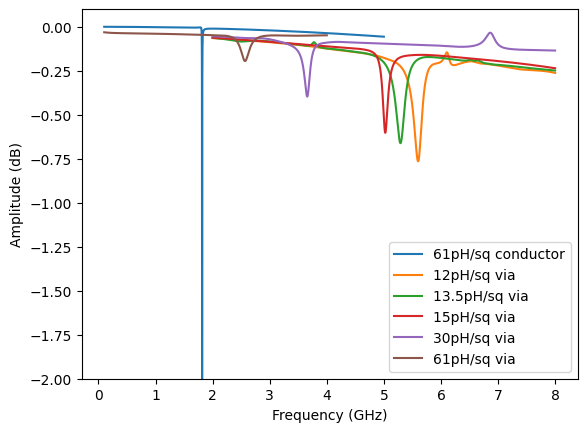

In [4]:
Lk = ['61pH/sq conductor', '12pH/sq via', '13.5pH/sq via','15pH/sq via', '30pH/sq via', '61pH/sq via' ]

for i, name in enumerate(d_via.keys()):

    plt.plot(1e-9*d_via[name]['freq'], d_via[name]['amp'], label = Lk[i])

plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.ylim(-2, 0.1)

20240717_1GHz_Pt_61pHsq f0 = 1.815 GHz
Pt-via-test-1GHz-12pHsq f0 = 5.599 GHz
Pt-via-test-1GHz-13p5pHsq f0 = 5.291 GHz
Pt-via-test-1GHz-15pHsq f0 = 5.024 GHz
Pt-via-test-1GHz-30pHsq f0 = 3.657 GHz
Pt-via-test-1GHz-61pHsq f0 = 2.567 GHz


Text(0, 0.5, 'Frequency (GHz)')

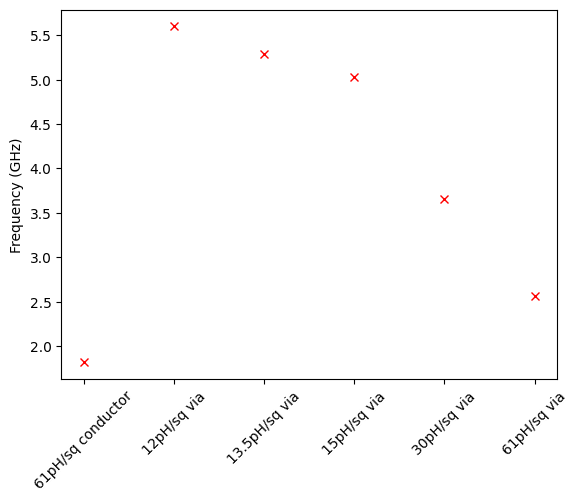

In [5]:
for i, name in enumerate(d_via.keys()):
    peak, _ = sig.find_peaks(-d_via[name]['amp'], prominence = 0.1)
    f0 = 1e-9*d_via[name]['freq'][peak[0]]
    print(f'{name} f0 = {f0:.3f} GHz')
    plt.plot(i, f0, 'rx')
    plt.xticks(range(len(d_via.keys())), Lk, rotation = 45)
plt.ylabel('Frequency (GHz)')

# Anneal Pt cap sim

['Al-on-Si.csv', 'NoQW.csv', 'Pt-inside.csv', 'Pt-on-Si.csv', 'Pt-on-top-thicken.csv', 'Pt-on-top.csv', 'Pt-substract-SiGe.csv']
[252.23952245 252.23952245 239.42680084 240.82481693 229.02325383
 219.73167199 219.83767818]


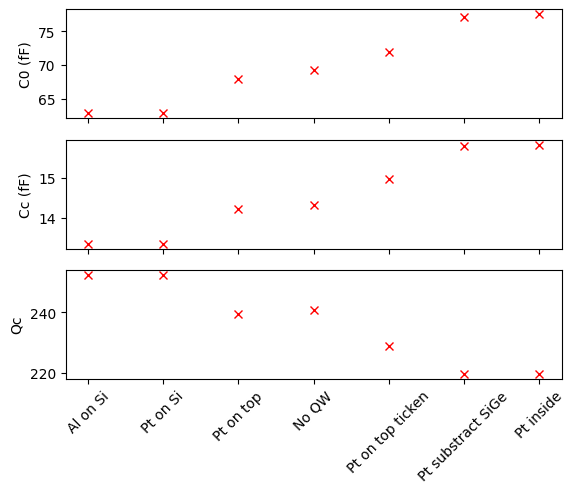

In [6]:
import csv
path = r'C:\Users\localadmin\Documents\Ansoft\Anneal-Pt-test'
file_list_all = os.listdir(path)
file_list = []
for f in file_list_all:
    if f.endswith('.csv'):
        file_list.append(f)
print(file_list)

C0 = []
Cc = []
for f in file_list:
    with open(os.path.join(path, f), mode ='r') as file:
        csvFile = csv.reader(file)
        for i, row in enumerate(csvFile):
            if i == 0:
                pass
            if i == 1:
                C0.append(float(row[1]))
                Cc.append(float(row[2]))
C0 = np.sort(-1*np.array(C0))
Cc = np.sort(-1*np.array(Cc)) 
fig, ax = plt.subplots(3,1)
ax[0].plot(C0, 'rx')
ax[0].set_ylabel('C0 (fF)')
ax[1].plot(Cc, 'rx')
ax[1].set_ylabel('Cc (fF)')
ax[0].set_xticks(ticks = range(len(C0)), labels = [])
ax[1].set_xticks(ticks = range(len(C0)), labels = [])

# ax[1].set_xticks(ticks = range(len(C0)), labels = ['No QW', 'Pt inside', 'Pt on top', 'Pt substract SiGe'])

fr = 5.4e9
Qc = 1e15*(Cc + C0)/(2*np.pi*fr*50*Cc**2)
print(Qc)
ax[2].plot(Qc, 'rx')
ax[2].set_ylabel('Qc')
ax[2].set_xticks(ticks = range(len(C0)), labels =  ['Al on Si', 'Pt on Si', 'Pt on top',  'No QW',  'Pt on top ticken',    'Pt substract SiGe',  'Pt inside',   ], rotation = 45)

# 
